## Load CSV File

In [46]:
#Check out efficiency by player, then team individually. 
#Work on a combining dataset to find efficient players by selecting a team later
##dataframe.iloc[:, :17].head()
import pandas as pd

# Load the CSV file
file_path = 'Advanced.csv'
advanced_df = pd.read_csv(file_path)

# # Display the first few rows to understand the structure
# print("Advanced Stats Data:")
# print(advanced_df.head())

## Preprocess Data

In [47]:
# Filter for the 2024 season
advanced_df = advanced_df[advanced_df['season'] == 2024]

# Handling missing values
advanced_df = advanced_df.dropna(subset=['player', 'tm', 'per', 'usg_percent'])

# Normalize numerical values (PER and USG%)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
advanced_df[['per', 'usg_percent']] = scaler.fit_transform(advanced_df[['per', 'usg_percent']])

# # Display the preprocessed dataframe
# print("\nPreprocessed Data:")
# print(advanced_df.head())

## Prep Dataset

In [48]:
from sklearn.model_selection import train_test_split

# Define features (PER and USG%)
features = advanced_df[['per', 'usg_percent']]

# Split the data into training and test sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# # Display the shapes of the train and test sets
# print("\nTraining set shape:", X_train.shape)
# print("Test set shape:", X_test.shape)

## Build and Train Model 

In [49]:
from sklearn.cluster import KMeans

# Build the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming we want to identify 5 clusters

# Train the model
kmeans.fit(X_train)

# Predict the clusters for the test set
test_clusters = kmeans.predict(X_test)

# Add cluster labels to the original dataframe for interpretation
advanced_df['Cluster'] = kmeans.predict(features)

# # Display the dataframe with cluster labels
# print("\nData with Cluster Labels:")
# print(advanced_df.head())

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## Identify Efficency of Players

In [50]:
# Sort players within each cluster based on PER and USG%
top_players = advanced_df.sort_values(by=['Cluster', 'per', 'usg_percent'], ascending=[True, False, False])

def get_best_players_for_team(team_name, data, top_n = 3):
    # Filter the data for the given team
#     team_data = data[data['tm'] == team_name]
      team_data['CombinedScore'] = team_data[['per', 'usg_percent']].mean(axis=1)
    # Check if the team data is empty
    if team_data.empty:
        return f"No data available for team {team_name}"
   
    # Find the player with the highest PER and USG%
#     best_player = team_data.loc[team_data[['per', 'usg_percent']].mean(axis=1).idxmax()]
   
#     return best_player
      best_players = team_data.sort_values(by='CombinedScore', ascending=False).head(top_n)
      return best_players[['player', 'tm', 'per', 'usg_percent', 'CombinedScore']]

# Example usage
team_name = 'NYK'  # Replace with the desired team name
best_players = get_best_players_for_team(team_name, advanced_df)
# print(f"\nBest player for team {team_name}:\n{best_players}")

## Evaluate Model 

Inertia for Training Data: 1.5637445965213592
Inertia for Test Data: 0.23143019415391455


C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

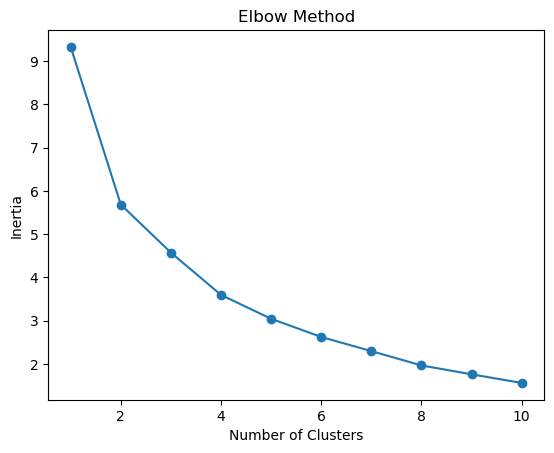

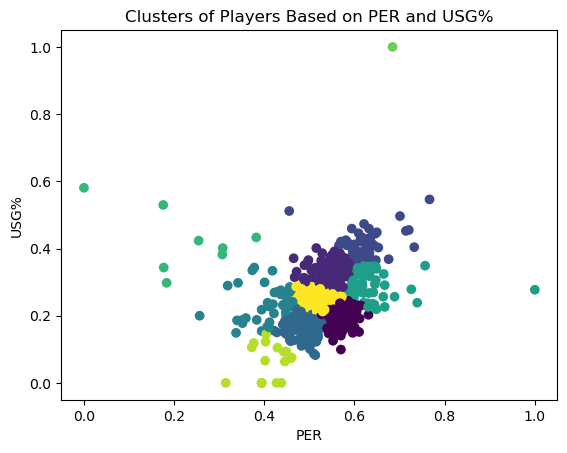

In [63]:
# Inertia
# Calculate the inertia for the training data
inertia_train = kmeans.inertia_
print("Inertia for Training Data:", inertia_train)

# For test data, we can use the predict method and calculate inertia manually
test_distances = kmeans.transform(X_test)
inertia_test = sum(np.min(test_distances, axis=1)**2)
print("Inertia for Test Data:", inertia_test)

#Elbow Method
import matplotlib.pyplot as plt

# Use the elbow method to determine the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# #Visual Inspection
# import matplotlib.pyplot as plt

# Plotting the clusters
plt.scatter(features['per'], features['usg_percent'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PER')
plt.ylabel('USG%')
plt.title('Clusters of Players Based on PER and USG%')
plt.show()